# Envelope Following to create an LFO wave

In [1]:
# Setup
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import convolve, hann, hamming, blackman, gaussian
from scipy.fft import fftshift
import soundfile as sf
import math

#Birds Recording
fs, data = wavfile.read("Birds.wav")


# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.5050463676452637
Max Value: 0.4929448366165161


/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_40230/1700025150.py:12: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read("Birds.wav")


Text(0.5, 1.0, 'Birdsong Recording')

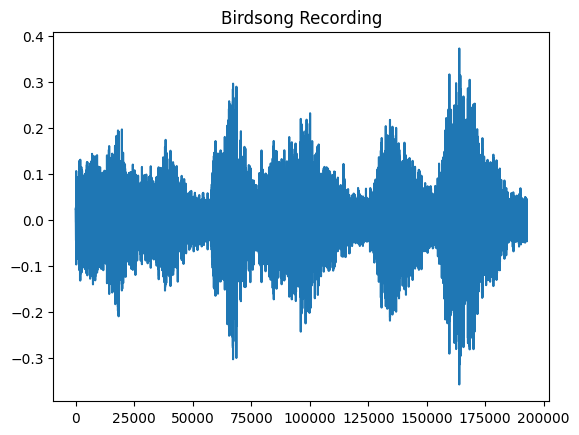

In [3]:
plt.plot(data[:, 0])
plt.title("Birdsong Recording")

In [7]:
sd.play(data,fs)

# Envelope following


In [13]:
# Array to hold LFO
lfo = np.zeros(len(data))

# Taking the absolute Value of the signal
for i in range(len(data)):
    lfo[i] = np.abs(data[i, 0])

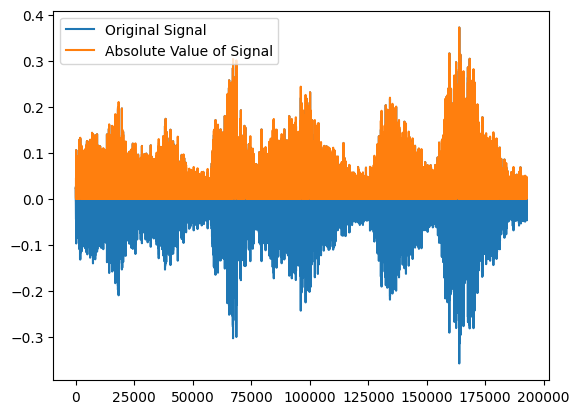

In [15]:
plt.plot(data[:, 0])
plt.plot(lfo)
plt.legend(["Original Signal", "Absolute Value of Signal"])

# Moving average filter to smooth out signal

In [18]:
# Computing the moving average of the signal
lfo_movingAvg = np.zeros(len(data))

# M defines how smooth the averaged signal is. Higher value results in smoother waveform
M = 14400

kernel = np.ones(2 * M + 1) / (2 * M + 1)

smoothed_lfo = convolve(np.abs(data[:, 0]), kernel, mode='same')

lfo_movingAvg = 2 * (smoothed_lfo - np.min(smoothed_lfo)) / np.ptp(smoothed_lfo) - 1


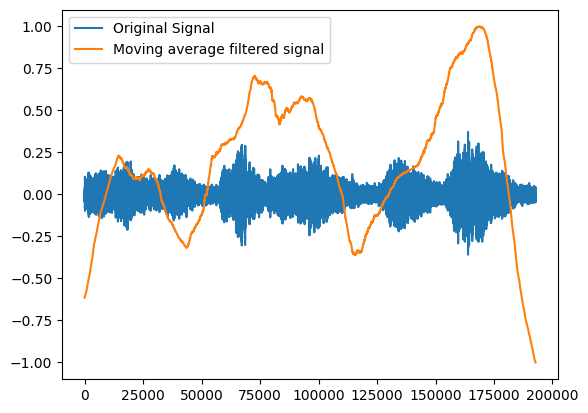

In [19]:
plt.plot(data[:, 0])
plt.plot(lfo_movingAvg) 
plt.legend(["Original Signal", "Moving average filtered signal"])

# Making the signal more of an LFO

In [20]:
# Attempting to make the signal oscillate more between 1 and -1
thresh_high = 0.25
thresh_low = -1

lfo_movingAvg[lfo_movingAvg > thresh_high] = thresh_high - (lfo_movingAvg[lfo_movingAvg > thresh_high] - thresh_high)

lfo_movingAvg = 2 * (lfo_movingAvg - np.min(lfo_movingAvg)) / np.ptp(lfo_movingAvg) - 1

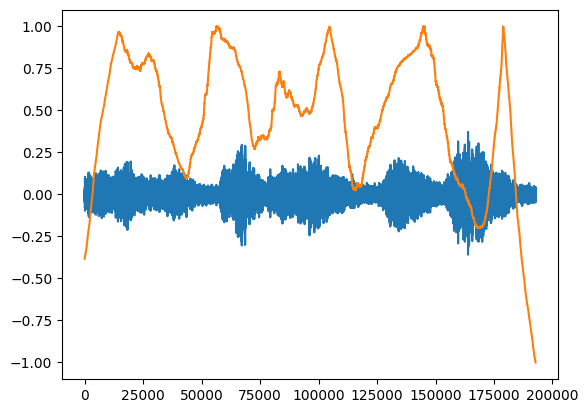

In [21]:
plt.plot(data[:, 0])
plt.plot(lfo_movingAvg) 

In [23]:
# Windowing signal to ensure it starts and ends at 0
window_length = len(lfo_movingAvg)
window = hann(window_length, sym =False)

window2 = hamming(window_length, sym =False)
window3 = blackman(window_length, sym =False)
window4 = gaussian(window_length, std =0.3)



windowedLFO_hann = lfo_movingAvg * window
windowedLFO_hamming = lfo_movingAvg * window2
windowedLFO_blackman = lfo_movingAvg * window3
windowedLFO_gaussian = lfo_movingAvg * window4


/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_40230/2525548444.py:3: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  window = hann(window_length, sym =False)
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_40230/2525548444.py:5: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window2 = hamming(window_length, sym =False)
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_40230/2525548444.py:6: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  window3 = bl

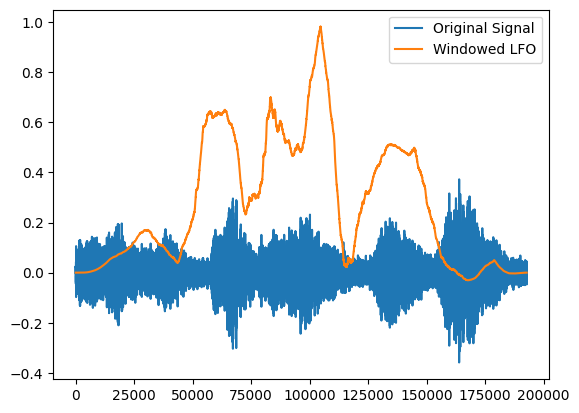

In [25]:
plt.plot(data[:, 0])
plt.plot(windowedLFO_hann) 
plt.legend(["Original Signal", "Windowed LFO"])
#plt.plot(windowedLFO_hamming) 
#plt.plot(windowedLFO_blackman) 
#plt.plot(windowedLFO_gaussian) 

In [26]:
# Writing the LFO to a .wav file
lfo_signal_scaled = (lfo_movingAvg * 32767).astype(np.int16)

# Define the output file name and sample rate
#output_file = 'Birds_lfo_waveform_noWindow.wav'
#sample_rate = fs  # Adjust as needed

# Save the LFO waveform as a WAV file
#wavfile.write(output_file, sample_rate, lfo_signal_scaled)